Amazon Alexa Review - Sentiment Analysis
Analyzing the amzone alexa dataset to predict te sentiment of a given sentence is positive or negative

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


C:\Users\ananya\AppData\Local\Temp\ipykernel_5368\1129963404.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [3]:
from wordcloud import WordCloud

In [4]:
import seaborn as sns

Exploratory Data Analysis

In [5]:
# Load data 
df = pd.read_csv('amazon_alexa.tsv', delimiter='\t', quoting= 3)
df.shape

(3150, 5)

In [6]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
#column names
print("Feature variables:" ,df.columns.values  )

Feature variables: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [8]:
print(f"Feature variables:{df.columns.values }" )

Feature variables:['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [9]:
#check for null values

df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [10]:
# getting the record where 'verified_reviews' is null

df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [11]:
# droping the null record

df.dropna(inplace=True)

In [12]:
# dataset after droping the null values
df.shape 

(3149, 5)

In [13]:
# Creating a new column 'Length' that will contain the length of the string in 'verified_reviews' column
df['length'] = df['verified_reviews'].apply(len)

In [14]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Analyzing 'rating' column

In [15]:
# Distinct values of 'ratings' and its count
print(f"Rating value count: \n{df['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


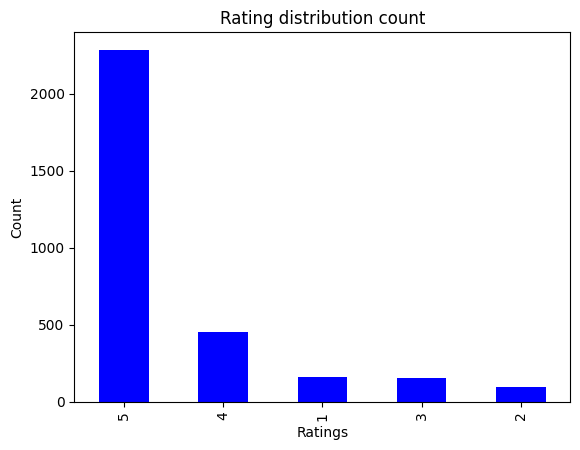

In [16]:
# bar plot - to visualize the total counts for each rating
df['rating'].value_counts().plot.bar(color='blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [17]:
# Finding the percentage of each rating - we'll divide the no.of records foro each rating by total no.of records
print(f"Rating value count - percentage ditribution :\n {round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage ditribution :
 rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


Analyzing the feedback column

In [18]:
# distincts values of 'feedback' and its count
print(f"Feedback value count: \n {df['feedback'].value_counts()}")

Feedback value count: 
 feedback
1    2893
0     256
Name: count, dtype: int64


In [19]:
# Extracting the 'verified_reviews' value for one record with feddback = 0
review_0 = df[df['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [20]:
review_1 = df[df['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


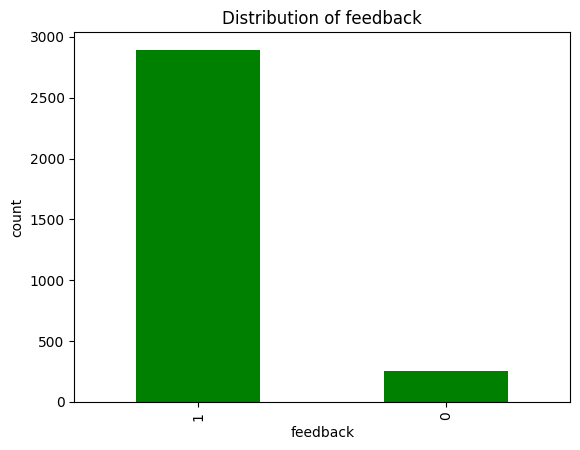

In [21]:
# bar plot for the distribution of feedback
df['feedback'].value_counts().plot.bar(color="green")
plt.title("Distribution of feedback")
plt.xlabel("feedback")
plt.ylabel('count')
plt.show()

In [22]:
#finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total no.of records
print(f"Feedback value count - percentage distribution : \n {round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

Feedback value count - percentage distribution : 
 feedback
1    91.87
0     8.13
Name: count, dtype: float64


In [23]:
#Feedback = 0
df[df['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [24]:
# Feedback = 1
df[df['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [25]:
df.head(15)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1,174
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1,367
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1,116


ANALYZING VARIATION COLUMN

In [26]:
print(f"Varitaion value count : \n {df['variation'].value_counts()}")

Varitaion value count : 
 variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


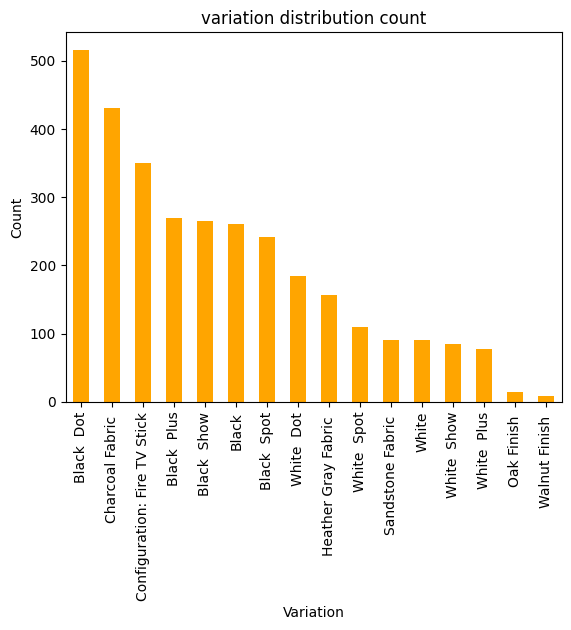

In [27]:
# bar graph for the distribution of count of variation
df['variation'].value_counts().plot.bar(color="orange")
plt.title('variation distribution count')
plt.xlabel("Variation")
plt.ylabel("Count")
plt.show()

In [28]:
# Finding the percentage distribution
print(f"Variation Value count :\n {round(df['variation'].value_counts()/df.shape[0]*100,2)}")


Variation Value count :
 variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [29]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

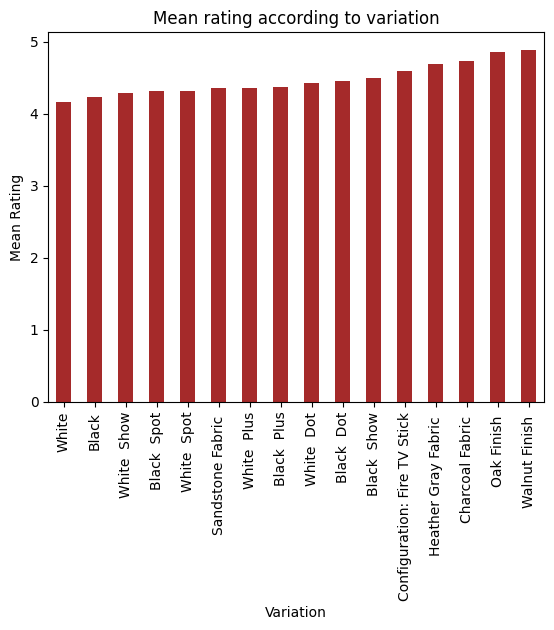

In [30]:
df.groupby("variation")['rating'].mean().sort_values().plot.bar(color='brown')
plt.title("Mean rating according to variation")
plt.xlabel("Variation")
plt.ylabel("Mean Rating")
plt.show()

Amazon "verified_ reviews" column

[Text(0.5, 1.0, 'Distribution of ength of review if feedback =1')]

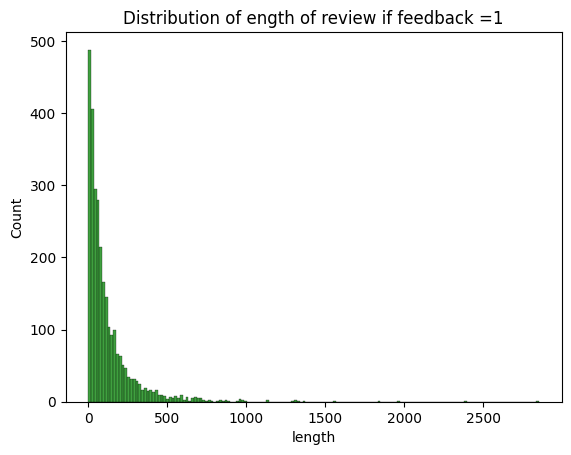

In [31]:
# Length analysis when feedback is positive
sns.histplot(df[df['feedback']==1]['length'],color="green").set(title="Distribution of ength of review if feedback =1")

[Text(0.5, 1.0, 'Distribution of ength of review if feedback =1')]

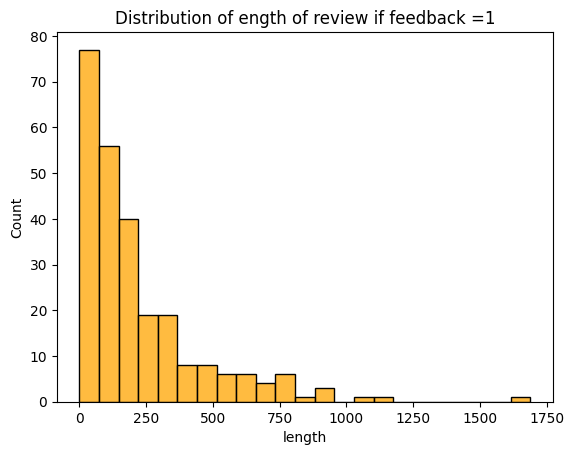

In [32]:
# Length analysis when feedback is negative
sns.histplot(df[df['feedback']==0]['length'],color="orange").set(title="Distribution of ength of review if feedback =1")

In [33]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)

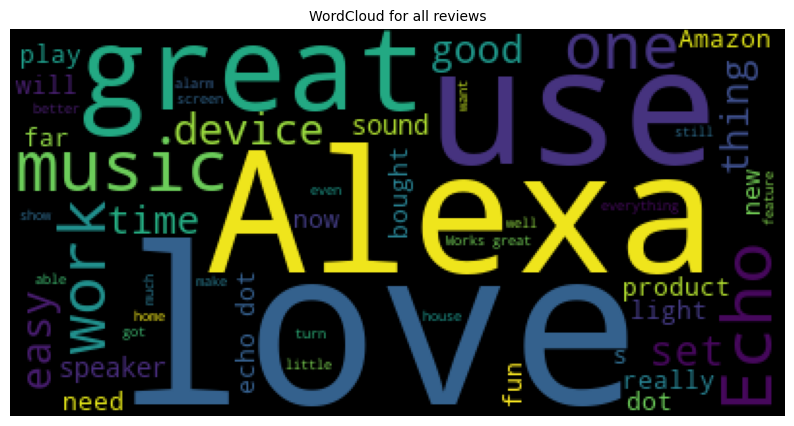

In [34]:
# Combine all reviews
reviews = " ".join([review for review in df['verified_reviews']])

#Initialize wordcloud object
wc = WordCloud(max_words=50)

#generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title("WordCloud for all reviews", fontsize=10)
plt.axis('off')
plt.show()

In [35]:
#dividing the data into positive and negative data
neg_reviews = ' '.join([review for review in df[df['feedback']==0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = ' '.join([review for review in df[df['feedback']==1]['verified_reviews'] ])
pos_reviews = pos_reviews.lower().split()

# finding words from reviews which are present in that feedback category only
unique_neg = [x for x in neg_reviews if x not in pos_reviews]
unique_neg = " ".join(unique_neg)

unique_pos = [x for x in pos_reviews if x not in neg_reviews]
unique_pos = " ".join(unique_pos)



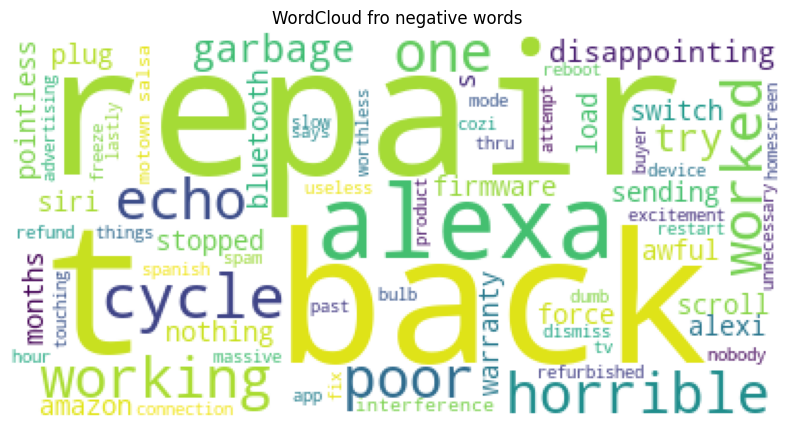

In [36]:

wc = WordCloud(background_color= "white", max_words=70)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_neg))
plt.title("WordCloud fro negative words")
plt.axis("off")
plt.show()

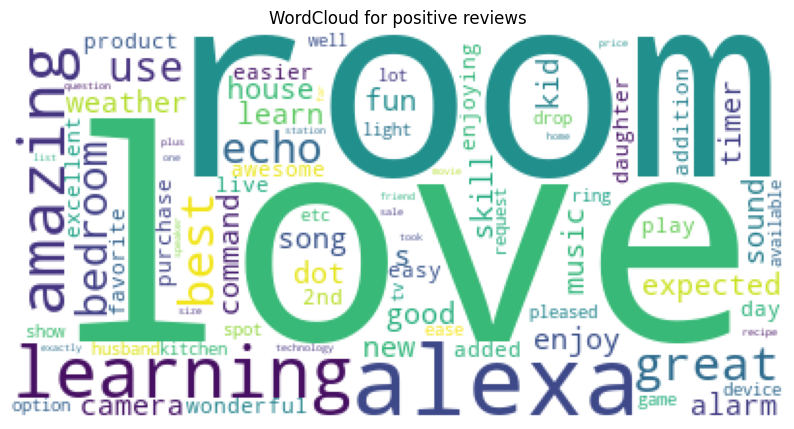

In [37]:
wc = WordCloud(background_color="white",max_words=80)
 
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_pos))
plt.title("WordCloud for positive reviews")
plt.axis("off")
plt.show()

### Pre-processing and Modelling
To build the corpus from the 'verified_reviews' we perform the following -
1.Replace all the non alphabetic character into space
2.Covert into lower case adnsplit into words
3.Iterate over the individual words and it is not a stopword then add the stemmed form of the word to the corpus.


In [44]:
corpus = []
stemmer = PorterStemmer()
for i in range(0,df.shape[0]):
    review = re.sub('[^a-zA-Z]','  ',df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [ stemmer.stem(word) for word in review if word not in(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [45]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

Using countvectorizer to create Bag Of Words

In [46]:
cv =CountVectorizer(max_features=2500)

#sorting independent and dependent variable 
x = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [48]:
#Saving the Count Vectorizer
pickle.dump(cv,open('Models/countVectorizer.pkl','wb'))

In [49]:
# shape of x and y
print(f"x shape : {x.shape}")
print(f"y shape : {y.shape}")


x shape : (3149, 2500)
y shape : (3149,)


Splitting data into train and test set with 30% data with testing

In [50]:
X_train, X_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

print(f"X train : {X_train.shape}")
print(f"X test : {X_test.shape}")
print(f"y train : {y_train.shape}")
print(f"y train : {y_test.shape}")

X train : (2204, 2500)
X test : (945, 2500)
y train : (2204,)
y train : (945,)


Scale X_train and X_test so that all values are between 0 and 1

In [51]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)


In [52]:
# saving the scaler model 
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))


Random Forest

In [ ]:
# Fitting scaled X_Train and y_train on random forest classifier

In [54]:
model_rf =  RandomForestClassifier()
model_rf.fit(X_train_scl,y_train)

RandomForestClassifier()

In [55]:
# accuracy of the model on training and testing data

print("Training accuracy :", model_rf.score(X_train_scl,y_train))
print("Testing accuracy :",model_rf.score(X_test_scl,y_test))


Training accuracy : 0.9945553539019963
Testing accuracy : 0.944973544973545


In [56]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [57]:
# confusion matrix
cm = confusion_matrix(y_test,y_preds)

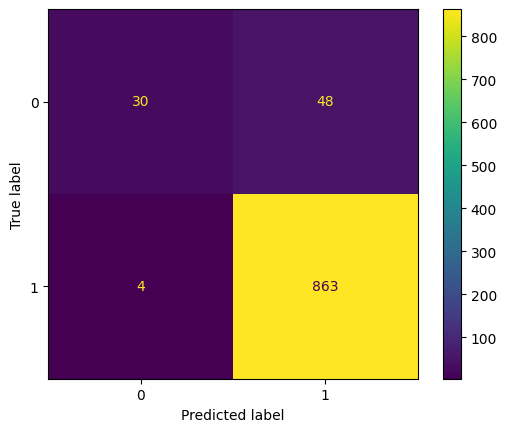

In [58]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()